In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import pingouin as pg
import matplotlib.pyplot as plt

## The Generalized Linear Model (GLM)

### The Univariate Linear Model: y = aX + b + e

  - **0D Point Formula** $ y = b $
  - **0D Linear Model:** $ y = b + e$
  - **1D Line Formula:** $ y = a x + b $
  - **Univariate Linear Model:** $  y = a x + b + e $
  - **Bivariate Linear Model:** $ y = ax_1 + bx_2 + c + e $
  - **Multivariate Linear Model:** $ y = (\sum_{i=1}^{n}{a_iX_i}) + b + e $
  - **Generalized Multivariate Linear Model:** $ y = (\sum_{i=1}^{n}{a_iX_i}) + e $, where $e$ is any distribution

  
  

**Exercises: Generating Linear Data**

In each of these exercises, we'll build up a function that generates data, starting from the simplest model to the more complex.

Let's start with the simplest:  $ y = b $


Example: Modify the function so that it takes a $b$ argument (a single value) and outputs it.  

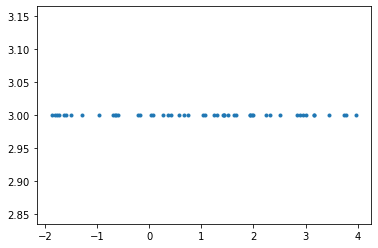

In [2]:
def generate_data(x, b):
    y = 0 * x + b
    return y

x = np.random.uniform(-2, 4, 50)
y = generate_data(x, 3)
plt.plot(x, y, '.');

Copy the code in the exercise above and past it below.

**0D Linear Model:** $ y = b + e$

Goal: Add an error term to the function, so that it generates a random, normally-distributed value added to $b$. 

*Note*: This error should have a mean of 0 and a standard deviation of $e$

Use it to generate a distribution with:
  - an offset of -6
  - an error with a standard deviation of 2

Copy the code in the exercise above and past it below.

**1D Linear Formula:** $ y = a x + b + e$

Goal: Add a coeffecient $a$ to the function, so that it generates a line with a slope of $a$

Use it to generate a line with:
  - a slope of 1.5
  - an intercept of 5
  - an error with a standard deviation of 0.5

Copy the code in the exercise above and past it below.

**Bivariate Linear Model:** $ y = ax_1 + bx_2 + c + e $

Goal: Add another coeffecient to the function and a second x input, according to the equation above.

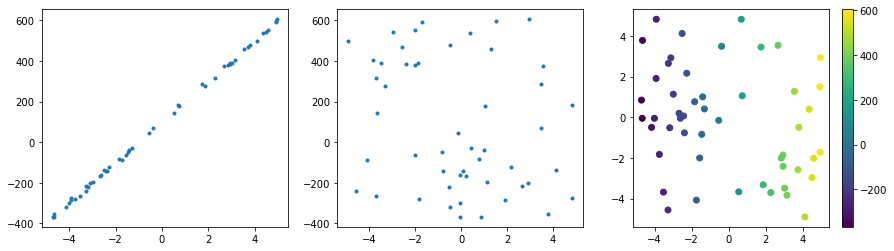

In [23]:
def generate_data(x1, x2, a, b, c, e):
    return a * x1 + b * x2 + c + stats.norm(0, e).rvs(len(x1))


x1 = np.random.uniform(-5, 5, 50)
x2 = np.random.uniform(-5, 5, 50)
y = generate_data(x1, x2, a=100, b=3, c=100, e=.1)
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(x1, y, '.')
plt.subplot(1, 3, 2)
plt.plot(x2, y, '.')
plt.subplot(1, 3, 3)
plt.scatter(x1, x2, c=y)
plt.colorbar();


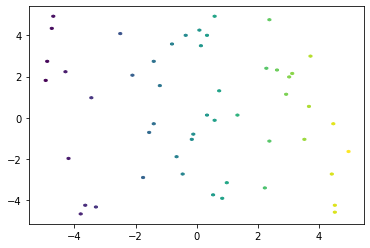

In [22]:
plt.hexbin(x1, x2, y);

Use it to generate a line that:
  - has a slope of 2.5 for the first x
  - has a slope of -1 for the second x
  - has an intercept of -10
  - has an error of 3

Copy the code in the exercise above and past it below.

**Multivariate Linear Model:** $ y = (\sum_{i=1}^{n}{a_iX_i}) + b + e $

Okay, now we have a lot of inputs.  Modify the function so that it takes a single two-dimensional $X$ matrix, and adds each coefficient to each column of $X$.

In [41]:
def generate_data(X, coeffs, e):
    return coeffs * X + stats.norm(0, e).rvs(X.shape)

X = np.random.uniform(low=-5, high=5, size=(3, 4))
X = np.append(X, np.ones((len(X), 1)), axis=1)
y = generate_data(X, coeffs=(100, 3, 5, 10, 5), e=.1)

In [44]:
np.ones((5, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

Use it to generate a line that:
  - has slopes of 2.5, 4, 7, and -2 respectively for each column of X
  - has an intercept of -80
  - has an error of 2

**Generalized Multivariate Linear Model:** $ y = (\sum_{i=1}^{n}{a_iX_i}) + e $, where $e$ is any distribution

Almost there!  All that's left is to make $e$ allowed to be any distribution.  Change the function so that $e$ is a `scipy.stats` distribution, 
and have it call `.rvs()` inside the function.  That will look something like the following:

```python
def call_rvs(e):
    return e.rvs(10)

call_rvs(e=stats.normal(0, 1))
```

In [48]:
X.shape

(3, 5)

In [49]:
y.shape

(3, 5)

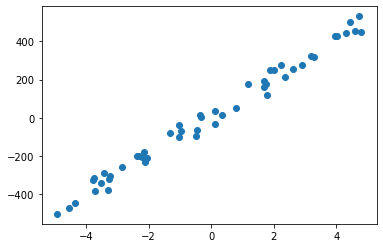

In [52]:
def generate_data(X, coeffs, e=stats.norm(0, 1)):
    return np.sum(coeffs * X, axis=1) + e.rvs(len(X))

X = np.random.uniform(low=-5, high=5, size=(50, 4))
X = np.append(X, np.ones((len(X), 1)), axis=1)
y = generate_data(X, coeffs=(100, 3, 5, 10, 5), e=stats.norm(0, 1))
plt.scatter(X[:, 0], y);

In [ ]:
generate_data(

Use it to generate a line that:
  - has slopes of 5, 1, and 6 respectively for each column of X
  - has an intercept of -80
  - has a lognormal-distributed error with a mean of 0 and sd of 2

## Linear Regression with Pingouin

Pingouin has a `linear_regression()` function that accepts a 2D $X$ and a 1D $y$, fitting the coeffecients for a linear model. 
It also provides statistics on its confidence in each fit, making it very useful for scientific research!  Let's try it out
and see if pingouin can guess the coefficients we chose to create our $y$ from $X$.

In [55]:
import pingouin as pg

**Exercise**

Use pingouin to fit data and get a feel for the tool!

In [54]:
def generate_glm(X, *coeffs, e=stats.norm(0, 1)):
    """Generates GLM data (backup function)"""
    return np.sum(X * coeffs, axis=1) + e.rvs(len(X))


X = np.random.uniform(-5, 5, size=(50, 2))
generate_glm(X, 3, 4, e=stats.norm(0, 1));

X = np.random.uniform(-5, 5, size=(30, 3))
y = generate_glm(X, 5, 10, 15, e=stats.norm(0, .5)) - 10
# plt.scatter(X[:, 0], y);

pg.linear_regression(X, y, add_intercept=True)

Use your data generator to make a line with a slope of 5 and an intercept of -10 on 30 points of data. Plot the line, and have pingouin fit it. Was it a good fit?

In [66]:
X = np.random.uniform(-5, 5, size=(30, 3))
y = generate_glm(X, 5, 10, 15, e=stats.norm(0, .5)) - 10
# plt.scatter(X[:, 0], y);

pg.linear_regression(X, y, add_intercept=True)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-9.921215,0.076270,-130.080288,4.046451e-38,0.999948,0.999942,-10.077990,-9.764439
1,x1,5.028073,0.027004,186.199639,3.642513e-42,0.999948,0.999942,4.972566,5.083580
2,x2,10.044564,0.025068,400.690497,8.147331e-51,0.999948,0.999942,9.993036,10.096092
3,x3,14.997381,0.027824,539.006659,3.655926e-54,0.999948,0.999942,14.940188,15.054575


Do the same, but this time with only 10 points of data.  How did the fit change?

Do the same, but this time with only 10 points of data and an error sd of 3.  How did the fit change?

This time, let's make a 2D model!  Make a 2D 30x2 matrix and pick slopes for each column and an intercept. Have pingouin fit it. Was it a good fit?

Use it to fit a polynomial model!  Modify X by making only one column, then append another column that is the first column squared.  
Plot the line (it should look curvy).  How did Pingouin do?

**Linear Regression on Real data**

Let's fit some outside data!  Here's a dataset containing records of tips and customers from one waiter in a restaurant

In [67]:
from pingouin.datasets import read_dataset
tips = read_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


How did the total_bill correlate with the tip?

How did the size of the table correlate with the total bill?

Is there a polynomial relationship between total_bill and tip?  
Add in a total_bill_squared column and regress both the total_bill and the squared with the tip.

Now let's add in the size of the table and compare all three variables!  

How about adding in qualitative data?  Let's try doing it with total_bill and smoker.
How is it getting results, what's happening here?

## Fitting Data with Statsmodels

Some terminology from Statsmodels:

  - [**exog**](https://www.statsmodels.org/stable/endog_exog.html#endog-exog--page-root): (`y`) The output data collected from a model: Always one-dimensional
  - [**endog**](https://www.statsmodels.org/stable/endog_exog.html#endog-exog--page-root): (`X`) The input data a model: Always two-dimensional, with each column representing a different variable
  - [**constant**]: A value of 1
  - [**family**]: The family of stastical distributions that determine the error of the model.
  
  
In this section, we'll practice fitting data to the GLM using the Statsmodels package!  

Take a look at this example from the statsmodels docs, and use it as the template code to do the exercises below: 

**https://www.statsmodels.org/stable/glm.html#examples**

**Exercises** Let's do the same thing we did with Pinguoin, but this time with Statsmodels.

In [147]:
def generate_glm(X, *coeffs, e=stats.norm(0, 1)):
    """Generates GLM data (backup function)"""
    return np.sum(X * coeffs, axis=1) + e.rvs(len(X))


X = np.random.uniform(-5, 5, size=(50, 2))
generate_data2(X, 3, 4, e=stats.norm(0, 1));

Use your data generator to make a line with a slope of 5 and an intercept of -10 on 30 points of data. Plot the line, and have statsmodels fit it. Was it a good fit?

(50, 2)

Do the same, but this time with only 10 points of data.  How did the fit change?

Do the same, but this time with only 10 points of data and an error sd of 3.  How did the fit change?

This time, let's make a 2D model!  Make a 2D 30x2 matrix and pick slopes for each column and an intercept. Have statsmodels fit it. Was it a good fit?

Use it to fit a polynomial model!  Modify X by making only one column, then append another column that is the first column squared.  
Plot the line (it should look curvy).  How did Pingouin do?

** Linear Regression on Real data **
Let's fit some outside data!  Here's a dataset containing records of tips and customers from one waiter in a restaurant

In [68]:
from pingouin.datasets import read_dataset
tips = read_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


How did the total_bill correlate with the tip?

In [88]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [91]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [97]:
results = smf.glm("tip ~ total_bill * size", data=tips).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    tip   No. Observations:                  244
Model:                            GLM   Df Residuals:                      240
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          1.0303
Method:                          IRLS   Log-Likelihood:                -347.84
Date:                Thu, 09 Jun 2022   Deviance:                       247.27
Time:                        17:12:03   Pearson chi2:                     247.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5798
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9183      0.510      1.801      0.072      -0.081       1.918
total_bill          0.0819      0.022      3.651      0.000       0.038       0.126
size                0.0933      0.206      0.452      0.651      -0.311       0.498
total_bill:size     0.0039      0.007      0.529      0.597      -0.011       0.019
===================================================================================
"""

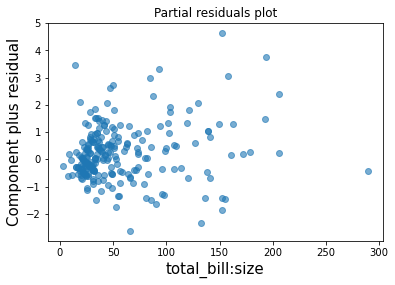

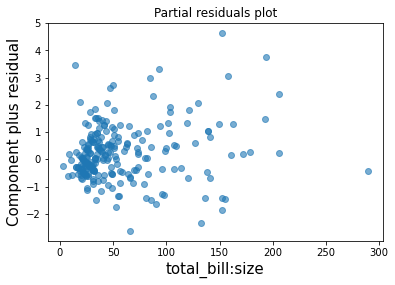

In [102]:
results.plot_partial_residuals('total_bill:size')

In [83]:
X = tips[['total_bill']]
X = sm.add_constant(X, prepend=False)
model = sm.GLM(X, tips['tip'], )
results = model.fit()
print(results.summary())

ValueError: operands could not be broadcast together with shapes (244,2) (244,) 

How did the size of the table correlate with the total bill?

Is there a polynomial relationship between total_bill and tip?  
Add in a total_bill_squared column and regress both the total_bill and the squared with the tip.

Now let's add in the size of the table and compare all three variables!  

How about adding in qualitative data?  Let's try doing it with total_bill and smoker.
How is it getting results, what's happening here?